In [21]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree

In [22]:
path=r"C:\Users\win10\Desktop\DATA SCIENCE\ExcelR\Assignment Given (Untouched)\10)Decision Tree\Fraud_check.csv"

In [23]:
path=path.replace('\\', '/')

In [24]:
df=pd.read_csv(path)

In [25]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [26]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


# Initial Observations
1)No missing values
2)3 categorical columns found


In [28]:
df["Undergrad"].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [29]:
df["Urban"].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [30]:
df["Urban"]=df["Urban"].map({"YES":1, "NO":0})    #Mapping Yes to 1 & No to 0

In [31]:
# df.Undergrad=df.Undergrad.astype('str')

In [32]:
df["Undergrad"]=df["Undergrad"].map({"YES":1, "NO":0})

In [33]:
df["Marital.Status"].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [34]:
df=pd.get_dummies(df, columns=["Marital.Status"],drop_first=True)

In [35]:
# Lets convert the sales (Target Variable) into Categorical Variable

In [36]:
df.head()

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Marital.Status_Married,Marital.Status_Single
0,0,68833,50047,10,1,0,1
1,1,33700,134075,18,1,0,0
2,0,36925,160205,30,1,1,0
3,1,50190,193264,15,1,0,1
4,0,81002,27533,28,0,1,0


In [37]:
df.corr()

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Marital.Status_Married,Marital.Status_Single
Undergrad,1.000000,-0.049232,0.079579,-0.005362,-0.000267,0.015120,0.028883
Taxable.Income,-0.049232,1.000000,-0.064387,-0.001818,0.070628,-0.100611,0.037910
City.Population,0.079579,-0.064387,1.000000,0.013135,-0.040098,-0.007035,0.002087
Work.Experience,-0.005362,-0.001818,0.013135,1.000000,-0.094559,0.033347,-0.018123
Urban,-0.000267,0.070628,-0.040098,-0.094559,1.000000,0.016771,0.047014
Marital.Status_Married,0.015120,-0.100611,-0.007035,0.033347,0.016771,1.000000,-0.520317
Marital.Status_Single,0.028883,0.037910,0.002087,-0.018123,0.047014,-0.520317,1.000000


In [39]:
df["Taxable.Income_cat"]=""

In [41]:
for i in range (0,len(df)):
    if df["Taxable.Income"][i]<=30000:
        df["Taxable.Income_cat"][i]=0   # 0 Indicates Risky 
    else:
        df["Taxable.Income_cat"][i]=1   # 1 Inddicates Good


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
df.head()

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Marital.Status_Married,Marital.Status_Single,Taxable.Income_cat
0,0,68833,50047,10,1,0,1,1
1,1,33700,134075,18,1,0,0,1
2,0,36925,160205,30,1,1,0,1
3,1,50190,193264,15,1,0,1,1
4,0,81002,27533,28,0,1,0,1


In [43]:
df["Taxable.Income_cat"]  # This column represents the Highsales & LowSales in 1 & 0 respectively

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income_cat, Length: 600, dtype: object

In [44]:
df = df.iloc[:,[0,2,3,4,5,6,1,7]]

In [57]:
df.head()

,Undergrad,City.Population,Work.Experience,Urban,Marital.Status_Married,Marital.Status_Single,Taxable.Income,Taxable.Income_cat
0,0,50047,10,1,0,1,68833,1
1,1,134075,18,1,0,0,33700,1
2,0,160205,30,1,1,0,36925,1
3,1,193264,15,1,0,1,50190,1
4,0,27533,28,0,1,0,81002,1


#  Assigning  Target & Predictor Variable 

In [46]:
X=df.drop(["Taxable.Income","Taxable.Income_cat"], axis=1)

In [47]:
X.head()

,Undergrad,City.Population,Work.Experience,Urban,Marital.Status_Married,Marital.Status_Single
0,0,50047,10,1,0,1
1,1,134075,18,1,0,0
2,0,160205,30,1,1,0
3,1,193264,15,1,0,1
4,0,27533,28,0,1,0


In [48]:
type(X)

pandas.core.frame.DataFrame

In [58]:
y=df["Taxable.Income_cat"]

In [59]:
type(y)

pandas.core.series.Series

In [60]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Taxable.Income_cat, dtype: object

In [61]:
y=y.astype('int64')

In [62]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Taxable.Income_cat, dtype: int64

# Train Test Split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.2, random_state=0)

In [138]:
X_train.head()

,Undergrad,City.Population,Work.Experience,Urban,Marital.Status_Married,Marital.Status_Single
118,0,199174,10,0,0,0
362,1,75552,17,1,0,0
55,1,89965,16,1,0,1
90,0,101232,29,0,0,0
390,1,57324,17,0,0,1


In [66]:
print(X_train.shape,X_test.shape,y_test.shape,y_train.shape,)

(480, 6) (120, 6) (120,) (480,)


In [67]:
from sklearn.tree import DecisionTreeClassifier


In [129]:
cltree=DecisionTreeClassifier(max_depth=5,)

In [130]:
cltree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [131]:
y_train.iloc[5].dtype

dtype('int64')

In [132]:
y_train_pred=cltree.predict(X_train)
y_test_pred=cltree.predict(X_test)

In [133]:
y_test_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

# Model Performance 

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [134]:
acc_score=accuracy_score(y_test,y_test_pred)

In [135]:
acc_score

0.775

In [136]:
con_matrix=confusion_matrix(y_test,y_test_pred)

In [137]:
con_matrix

array([[ 1, 24],
       [ 3, 92]], dtype=int64)

# Plotting Decision Tree

In [78]:
dot_data=tree.export_graphviz(cltree,out_file=None,feature_names=X_train.columns, filled=True)

In [79]:
from IPython.display import Image

In [80]:
import pydotplus

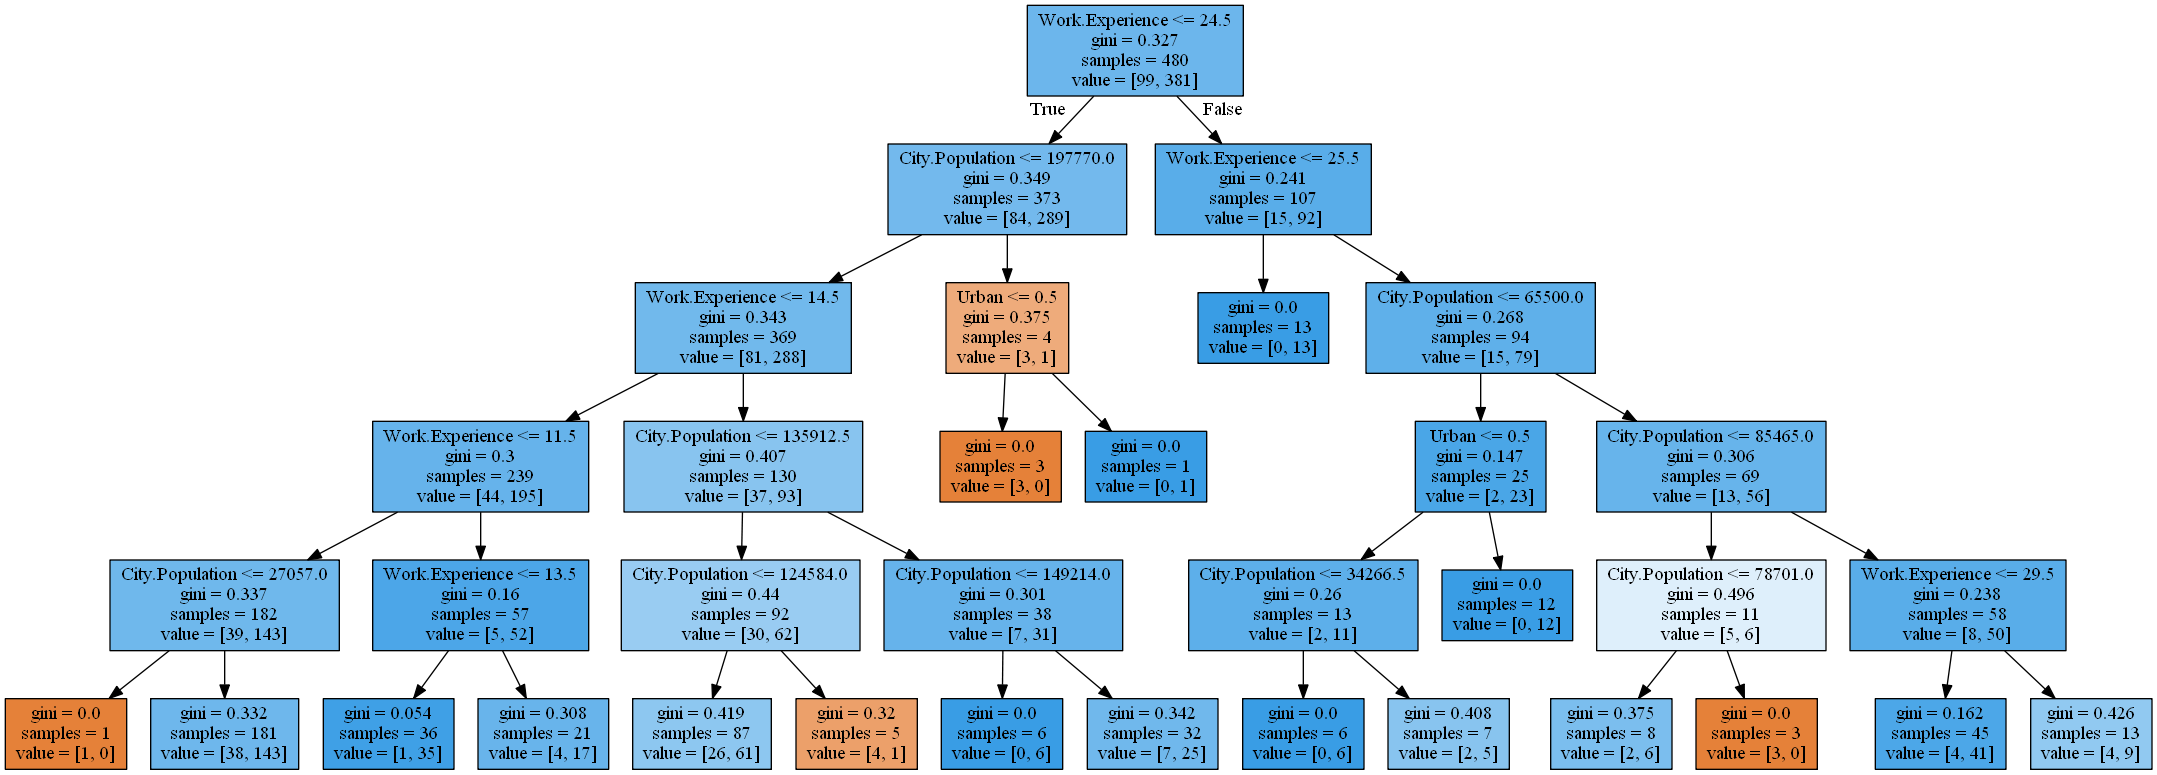

In [81]:
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Controlling tree growth

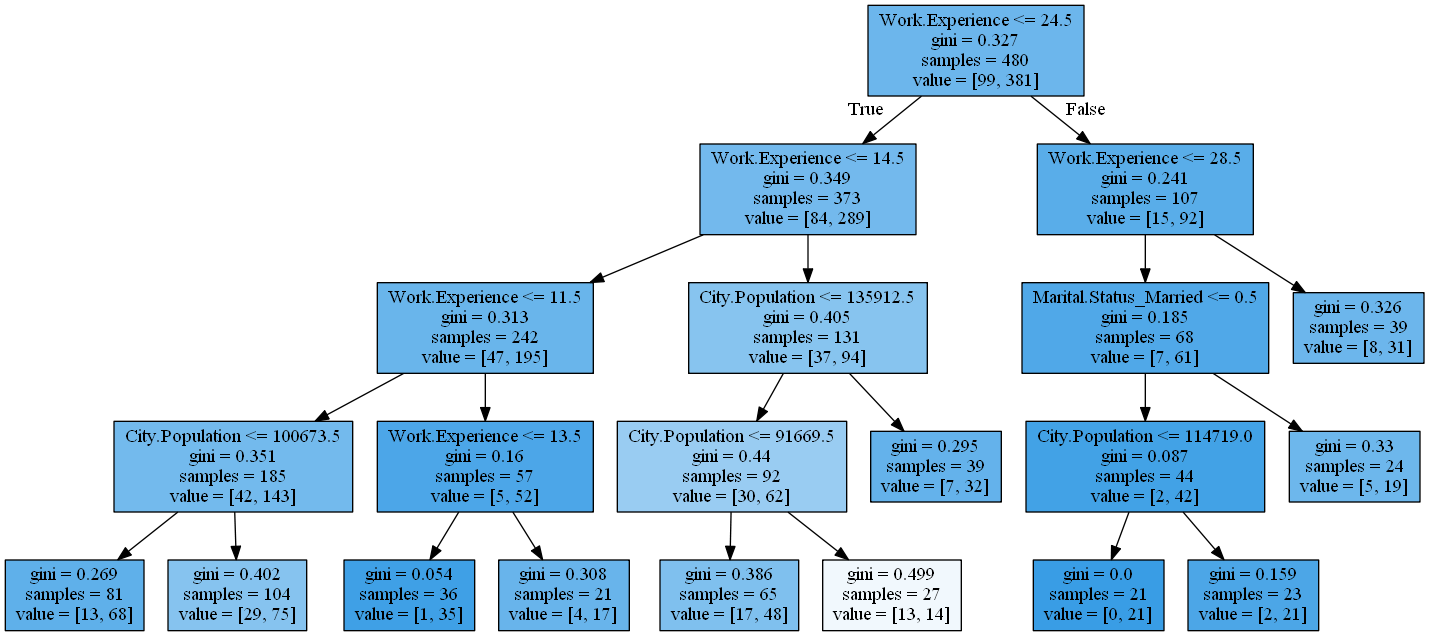

In [82]:
cl2tree=DecisionTreeClassifier(max_depth=4,min_samples_leaf=20)
cl2tree.fit(X_train,y_train)
dot_data=tree.export_graphviz(cl2tree,out_file=None,feature_names=X_train.columns, filled=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Bagging

In [83]:
clftree=DecisionTreeClassifier()


In [84]:
from sklearn.ensemble import BaggingClassifier

In [85]:
bag_clf=BaggingClassifier(base_estimator=clftree,n_estimators=1000,bootstrap=True,random_state=42, n_jobs=-1)

In [86]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [87]:
confusion_matrix(y_test,bag_clf.predict(X_test))

array([[ 1, 24],
       [ 5, 90]], dtype=int64)

In [88]:
accuracy_score(y_test,bag_clf.predict(X_test))

0.7583333333333333

# Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
rand_class=RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=42)

In [91]:
rand_class.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [92]:
accuracy_score(y_test,rand_class.predict(X_test))

0.75

In [93]:
confusion_matrix(y_test,rand_class.predict(X_test))

array([[ 2, 23],
       [ 7, 88]], dtype=int64)

# Grid Search

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
rfclf=RandomForestClassifier(random_state=42,n_estimators=250)

In [96]:
param_grid={"max_features":[4,5,6,7,8,9,10],
                        "min_samples_split":[2,3,10]}

In [97]:
grid_search=GridSearchCV(rfclf,param_grid,n_jobs=-1,cv=5, scoring='accuracy')

In [98]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=250, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [99]:
grid_search.best_params_

{'max_features': 6, 'min_samples_split': 10}

In [100]:
grid_search.best_score_

0.775

In [101]:
cvrf_clf=grid_search.best_estimator_

In [102]:
accuracy_score(y_test,cvrf_clf.predict(X_test))

0.775

In [103]:
confusion_matrix(y_test,cvrf_clf.predict(X_test))

array([[ 0, 25],
       [ 2, 93]], dtype=int64)

# Gradient Boosting

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

In [105]:
gb_clf=GradientBoostingClassifier()

In [106]:
gb_clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [107]:
accuracy_score(y_test,gb_clf.predict(X_test))

0.7416666666666667

In [108]:
gb_cl2=GradientBoostingClassifier(learning_rate=0.02, n_estimators=1000,max_depth=1)
gb_cl2.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [109]:
accuracy_score(y_test,gb_cl2.predict(X_test))

0.7916666666666666

# Applying Grid Search

In [110]:
gb_cl3=GradientBoostingClassifier()

In [111]:
param={"learning_rate":[0.01,0.1],
       "n_estimators":[500,750,1000],
      "max_depth":[1,2,3,4,5],}

In [112]:
grid_search_gBoost=GridSearchCV(gb_cl3,param,n_jobs=-1,cv=5, scoring='accuracy')

In [113]:
grid_search_gBoost.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [114]:
grid_search_gBoost.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [115]:
grid_search_gBoost.best_score_

0.7895833333333334

# Applying ADA Boost

In [116]:
from sklearn.ensemble import AdaBoostClassifier

In [117]:
adclf=AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [118]:
adclf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.02,
                   n_estimators=5000, random_state=None)

In [119]:
accuracy_score(y_test,adclf.predict(X_test))

0.7833333333333333

In [120]:
adclf2=AdaBoostClassifier(rfclf,learning_rate=0.02, n_estimators=500)

In [121]:
adclf2.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [122]:
accuracy_score(y_test,adclf2.predict(X_test))

0.725

In [123]:
from xgboost import XGBClassifier
import xgboost as xgb

In [124]:
xgb_clf= XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3, n_jobs=-1 )

In [125]:
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10000, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [126]:
accuracy_score(y_test,xgb_clf.predict(X_test))

0.6666666666666666

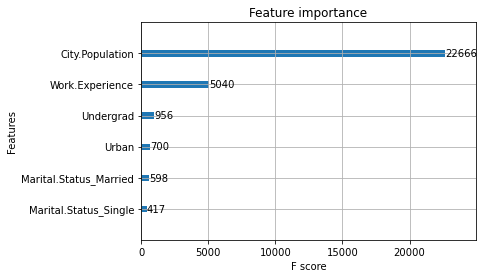

In [127]:
xgb.plot_importance(xgb_clf)